In this part of the assignment you have to implement multivariate gradient descent to find the minimas (local and global) of the given function:
Note : you can find different minimas by changing your initialisation.  
$f(x, y) = x^4 + x^2y^2 - y^2 + y^4 + 6$

[9.98604344e-07 7.07106781e-01]
[ 9.70331571e-07 -7.07106781e-01]
[0.00629957 0.        ]
[0.00629954 0.        ]
[ 9.88632174e-07 -7.07106781e-01]
[0.00629957 0.        ]
[0.00629957 0.        ]
[9.70331571e-07 7.07106781e-01]
[nan nan]
[nan nan]
[nan nan]
[nan nan]


<ipython-input-4-1fdcdeab2a2f>:17: RuntimeWarning: overflow encountered in double_scalars
  vec=np.array([4*x**3+2*x*y**2, 2*y*x**2-2*y+4*y**3])
<ipython-input-4-1fdcdeab2a2f>:17: RuntimeWarning: invalid value encountered in double_scalars
  vec=np.array([4*x**3+2*x*y**2, 2*y*x**2-2*y+4*y**3])
<ipython-input-4-1fdcdeab2a2f>:25: RuntimeWarning: invalid value encountered in subtract
  v1=v0-eta*gradient(v0)


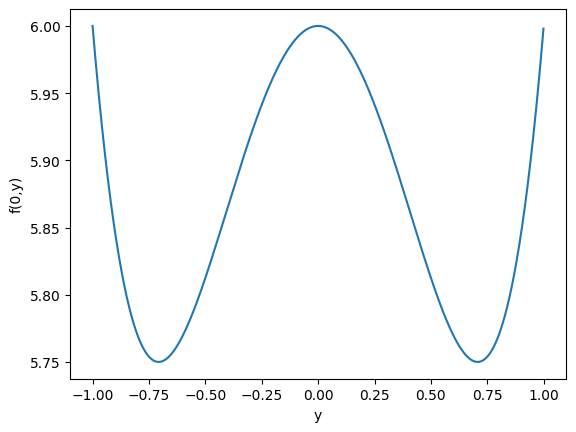

Local minima:  [9.98604344e-07 7.07106781e-01] [ 9.70331571e-07 -7.07106781e-01]
Global minima:  [array([9.98604344e-07, 7.07106781e-01]), array([ 9.70331571e-07, -7.07106781e-01])]


In [4]:
#start your code here :)
import numpy as np
import matplotlib.pyplot as plt


def mag(v):
  return (v[0]**2+v[1]**2)**0.5

def f(v):
  x=v[0]
  y=v[1]
  return x**4+x**2*y**2-y**2+y**4+6

def gradient(v):
  x=v[0]
  y=v[1]
  vec=np.array([4*x**3+2*x*y**2, 2*y*x**2-2*y+4*y**3])
  return vec

def descenterr(eta, v0):
  errx=abs((gradient(v0))[0])
  erry=abs(gradient(v0)[1])
  v1=v0.copy()
  while errx>0.000001 or erry>0.000001:
    v1=v0-eta*gradient(v0)
    v0=v1.copy()
    errx=abs((gradient(v0))[0])
    erry=abs(gradient(v0)[1])
  return v1


def descentiter(eta, v0, no_of_iter):
  v1=v0.copy()
  for _ in range(no_of_iter):
    v1=v0-eta*gradient(v0)
    v0=v1.copy()
  return v1


initial=[1,1]
print(descenterr(0.1, initial))

initial=[1,-0.5]
print(descenterr(0.1, initial))

initial=[1,0]
print(descenterr(0.1, initial))

initial=[0.5, 0]
print(descenterr(0.1, initial))

initial=[0.5, -0.5]
print(descenterr(0.1, initial))

initial=[1,0]
print(descenterr(0.1, initial))

initial=[2,1]
print(descenterr(0.1, initial))

initial=[1,0.5]
print(descenterr(0.1, initial))

initial=[10,10]
print(descenterr(0.1, initial))

initial=[-10,-10]
print(descenterr(0.1, initial))

initial=[5,5]
print(descenterr(0.1, initial))

initial=[-5,-5]
print(descenterr(0.1, initial))


#the three points found by various initialisations are approx (0,0), (0,0.7071068) and (0, -0.7071068)
#we can plot the graph of f for x=0 since all possible points found have x coord=0

xpoints=[]
ypoints=[]
i=-1
while i<1:
  xpoints.append(i)
  ypoints.append(f([0, i]))
  i=i+0.001
plt.plot(xpoints, ypoints)
plt.xlabel("y")
plt.ylabel("f(0,y)")
plt.show()

#clearly from the plot, minima are (0, 0.7071068) and (0, -0.7071068)
#to find global minimum, compare the value of f at the two local minima, since the function is increasing on both the other sides after the minima
v1=descenterr(0.1, [1,1])
v2=descenterr(0.1, [1,-0.5])
globalmin=[0,0]
if f(v1)-f(v2)>0.0001:
  globalmin=v2
elif f(v2)-f(v1)>0.0001:
  globalmin=v1
else:
#both are equal then both are global minima
  globalmin=[v1,v2]

print("Local minima: ", v1, v2)
print("Global minima: ", globalmin)